# [실습1] 은나노 입자 생성 데이터를 활용한 EDA 실습 (정답)
----

## 실습 목차
---
1. Iris EDA
1. 은나노 입자 생성 과정에 대한 개요 및 데이터 특성 이해
1. 데이터 결측치, 이상치 및 노이즈 탐지 및 처리
1. 히스토그램, 박스 플롯 등 데이터 시각화를 통한 EDA
1. EDA 결과 평가 및 의미 도출

## 실습 개요
---
이번 실습에서는 pandas를 이용하여 데이터프레임을 다루는데 익숙해지며 은나노 입자 생성 데이터를 탐색적으로 분석합니다.

## 1. Iris EDA

---

[Iris(붓꽃)](https://archive.ics.uci.edu/ml/datasets/iris) 데이터에 대해 EDA(탐색적 데이터 분석)을 진행합니다.

Iris 데이터셋에는 150개의 샘플이 있으며, 각 샘플은 4개의 특성(입력 변수)과 해당 샘플이 속한 3가지 클래스(붓꽃의 종류)를 가지고 있습니다. 

**클래스 종류**
1. Setosa: 세토사 붓꽃
2. Versicolor: 버시컬러 붓꽃
3. Virginica: 버지니카 붓꽃

**특성 종류**
1. Sepal Length (꽃받침 길이): cm 단위로 측정한 꽃받침의 길이
2. Sepal Width (꽃받침 너비): cm 단위로 측정한 꽃받침의 너비
3. Petal Length (꽃잎 길이): cm 단위로 측정한 꽃잎의 길이
4. Petal Width (꽃잎 너비): cm 단위로 측정한 꽃잎의 너비

Iris 데이터셋은 데이터 분석, 분류 알고리즘의 성능 평가, 시각화 연습 등에 널리 사용됩니다. 데이터의 클래스 분포와 특성들 간의 상관 관계를 분석하고, 이를 기반으로 붓꽃의 종류를 예측하는 모델을 개발할 수 있습니다. 이러한 특성으로 인해 Iris 데이터셋은 기계 학습 및 데이터 과학 분야에서 광범위하게 활용되고 있습니다.

### 1.1 라이브러리 불러오기

 - **pandas**: 데이터프레임을 다루기 위한 라이브러리
 - **matplotlib.pyplot**: 데이터시각화를 위한 라이브러리
 - **seaborn**: 데이터시각화를 위한 라이브러리
 - **numpy**: 고성능 수치연산을 위한 라이브러리
 - **sklearn**: 머신러닝을 다루기 위한 라이브러리
 - **warrings**: 경고 메시지를 다루기 위한 라이브러리


In [2]:
# 라이브러리 설치
#!pip install pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings("ignore")

C:\Users\Becky\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


pandas를 이용하여 iris.csv를 불러옵니다.

In [4]:
df = pd.read_csv("./data/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


기본적인 정보를 확인합니다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


통계를 확인합니다.

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


붓꽃의 종이 각각 몇개씩 있는지 확인합니다.

In [8]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
species_counts = df["species"].value_counts()
species_counts

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
species_counts.index

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

species_counts를 pie 차트로 시각화 합니다.

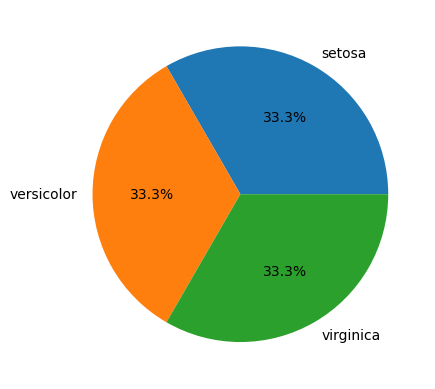

In [11]:
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.show()

산점도로 sepal_length, sepal_width를 시각화 합니다.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

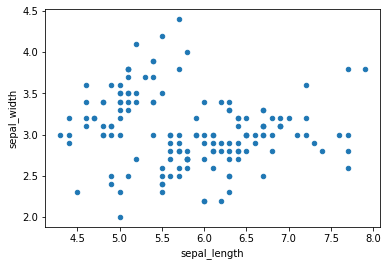

In [7]:
df.plot(kind="scatter", x="sepal_length", y="sepal_width")

이번엔 sns를 이용하여 species 값별로 색을 달리하는 산점도를 시각화 합니다.

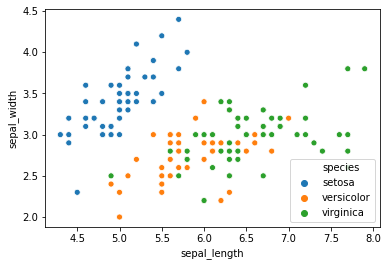

In [7]:
sns.scatterplot(
    data = df,
    x = "sepal_length",
    y = "sepal_width",
    hue = "species"
)
plt.show()

- setosa는 확연히 구분되는 것을 볼 수 있습니다.
- versicolor과 viginica는 혼재하는 부분이 있긴 하지만 어느정도 구분이 되는 것을 볼 수 있습니다.

seaborn의 jointplot은 산점도와 히스토그램을 함께 보여줍니다.

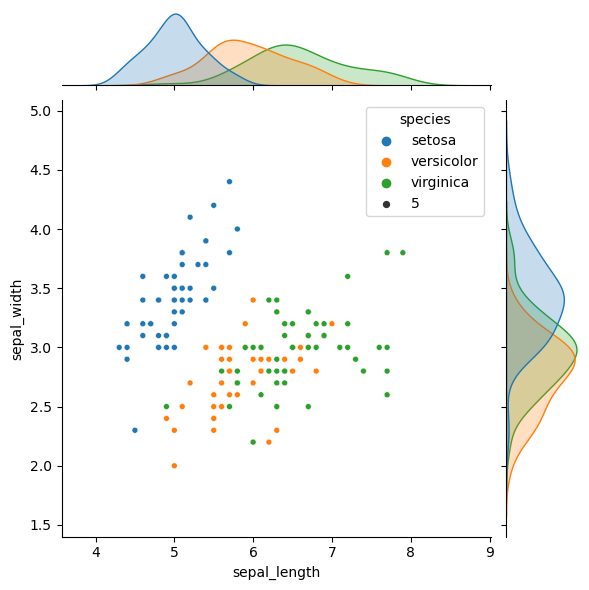

In [21]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size = 5,  hue="species")

각 컬럼별로 boxplot을 그려봅니다.

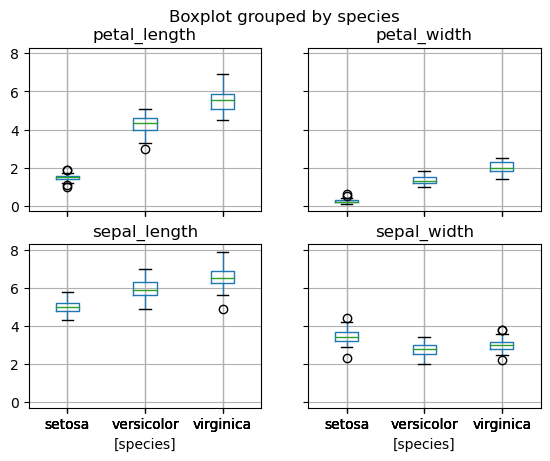

In [22]:
df.boxplot(by="species")
plt.show()

이번엔 sns의 boxplot을 이용하여 시각화 합니다.

In [24]:
plt.figure(figsize=(15,10))
plt.show()

<Figure size 1500x1000 with 0 Axes>

1 sepal_length
2 sepal_width
3 petal_length
4 petal_width


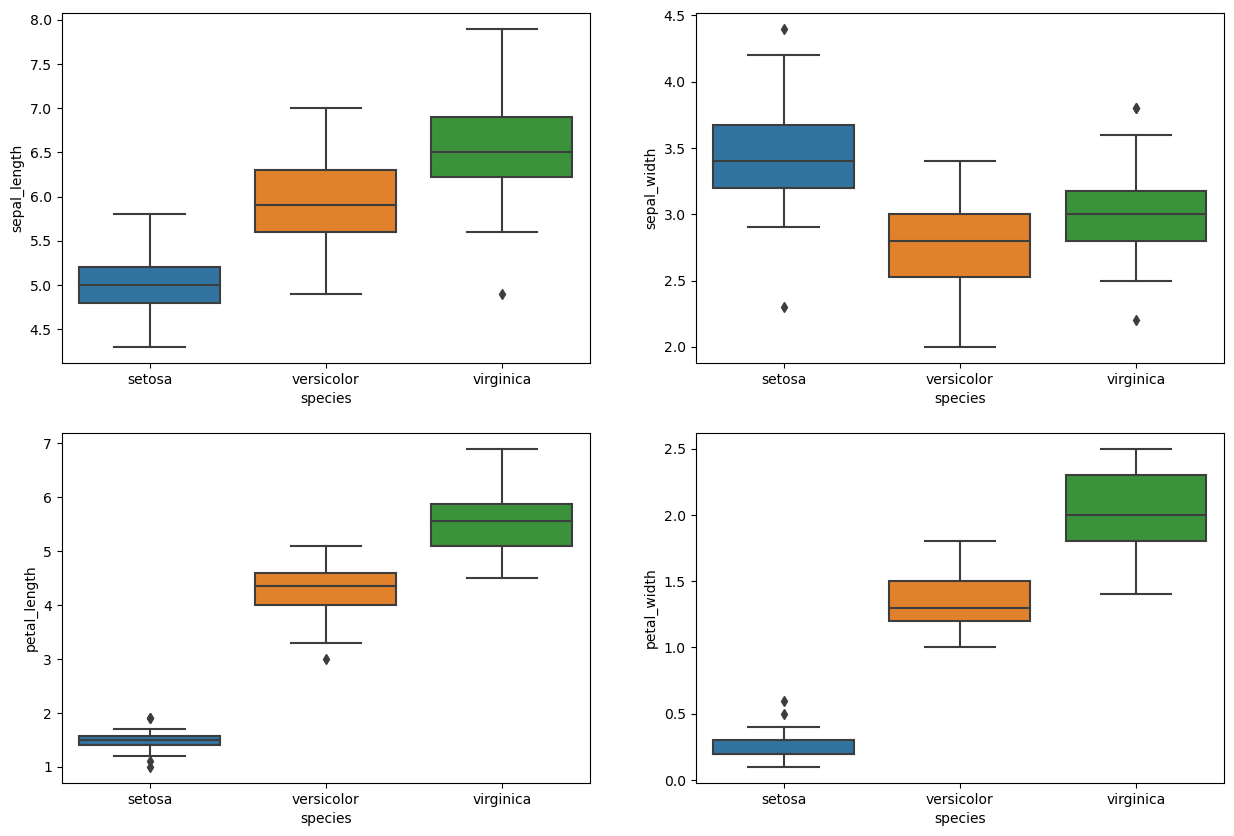

In [28]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], start=1):
    print(i, col)
    plt.subplot(2,2,i)
    sns.boxplot(x="species", y=col, data=df)

sns의 violinplot을 이용하여 시각화 합니다.

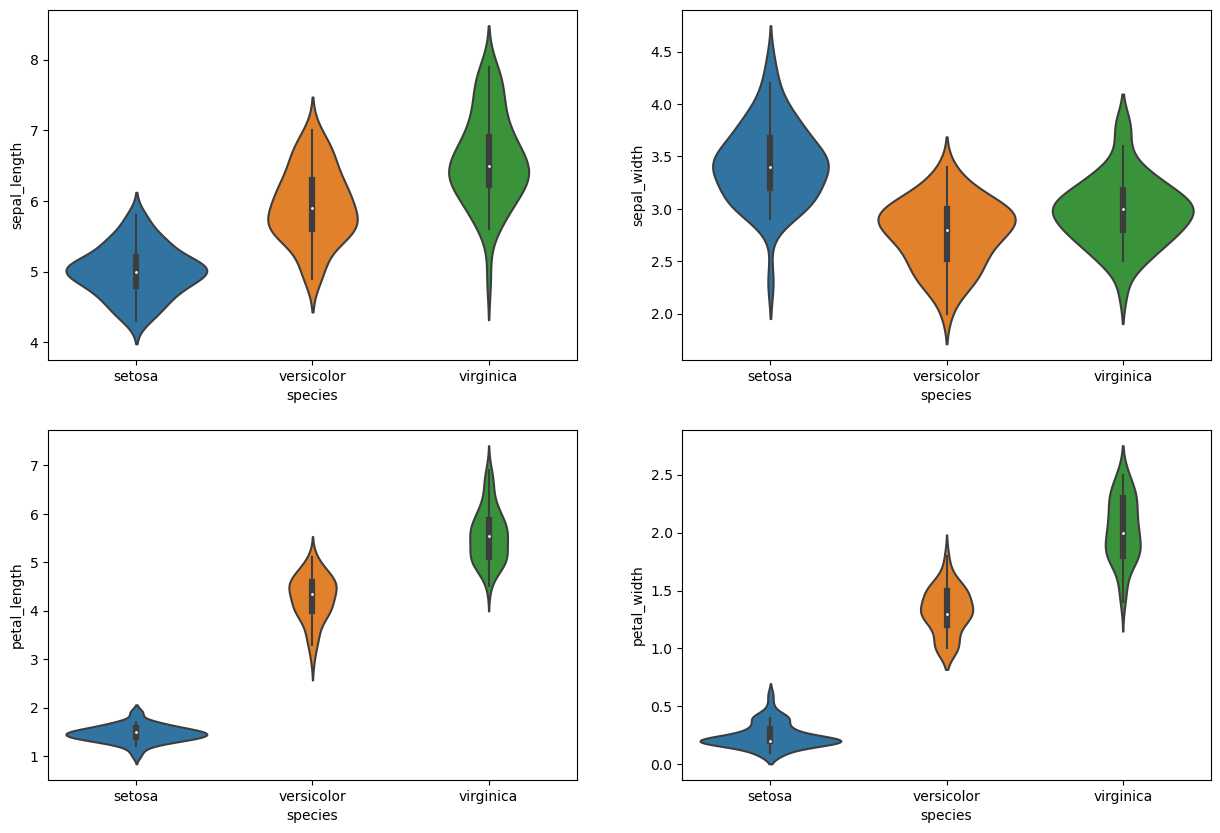

In [32]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], start=1):
    plt.subplot(2,2,i)
    sns.violinplot(x='species',y=col,data=df)

- violinplot을 이용하면 값의 밀도도 함께 확인할 수 있습니다.

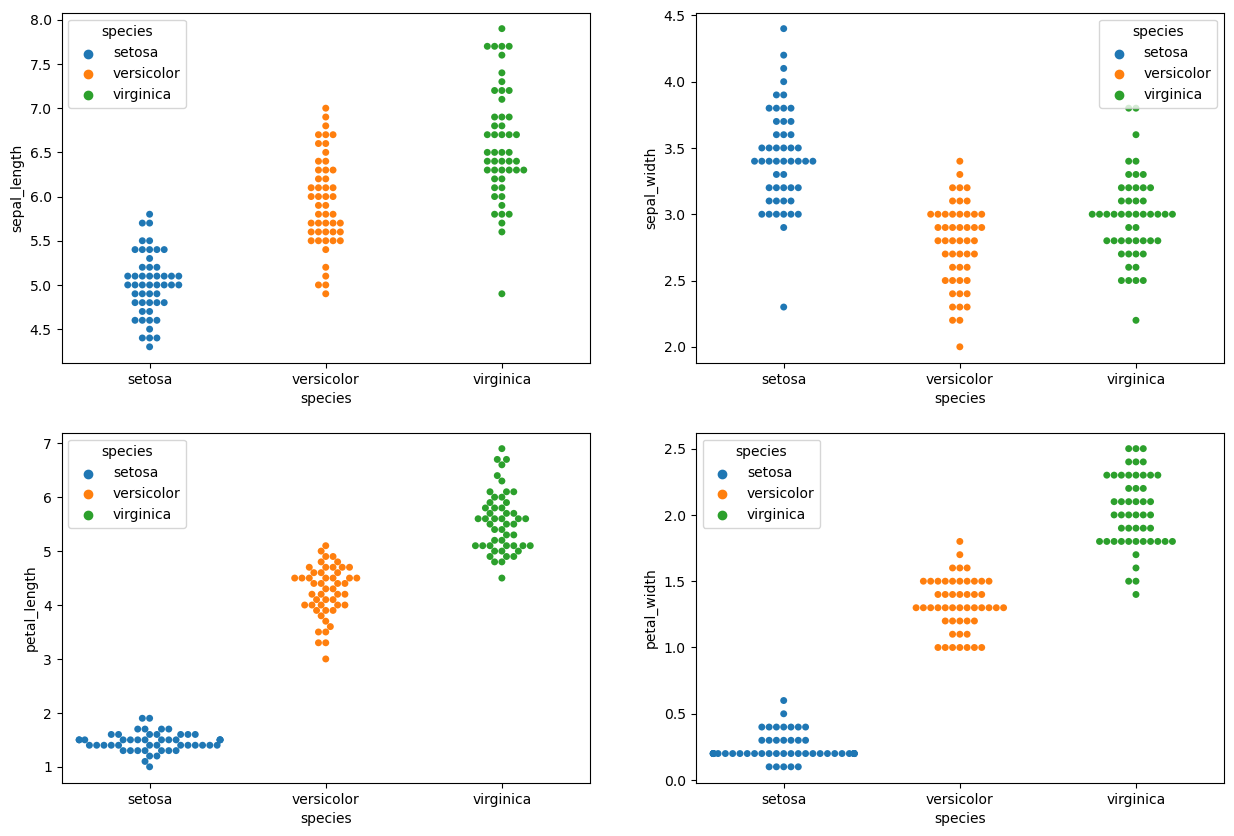

In [31]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], start=1):
    plt.subplot(2,2,i)
    sns.swarmplot(x='species',y=col,data=df, hue = 'species')

sns의 histplot을 이용하여 히스토그램을 시각화 합니다.

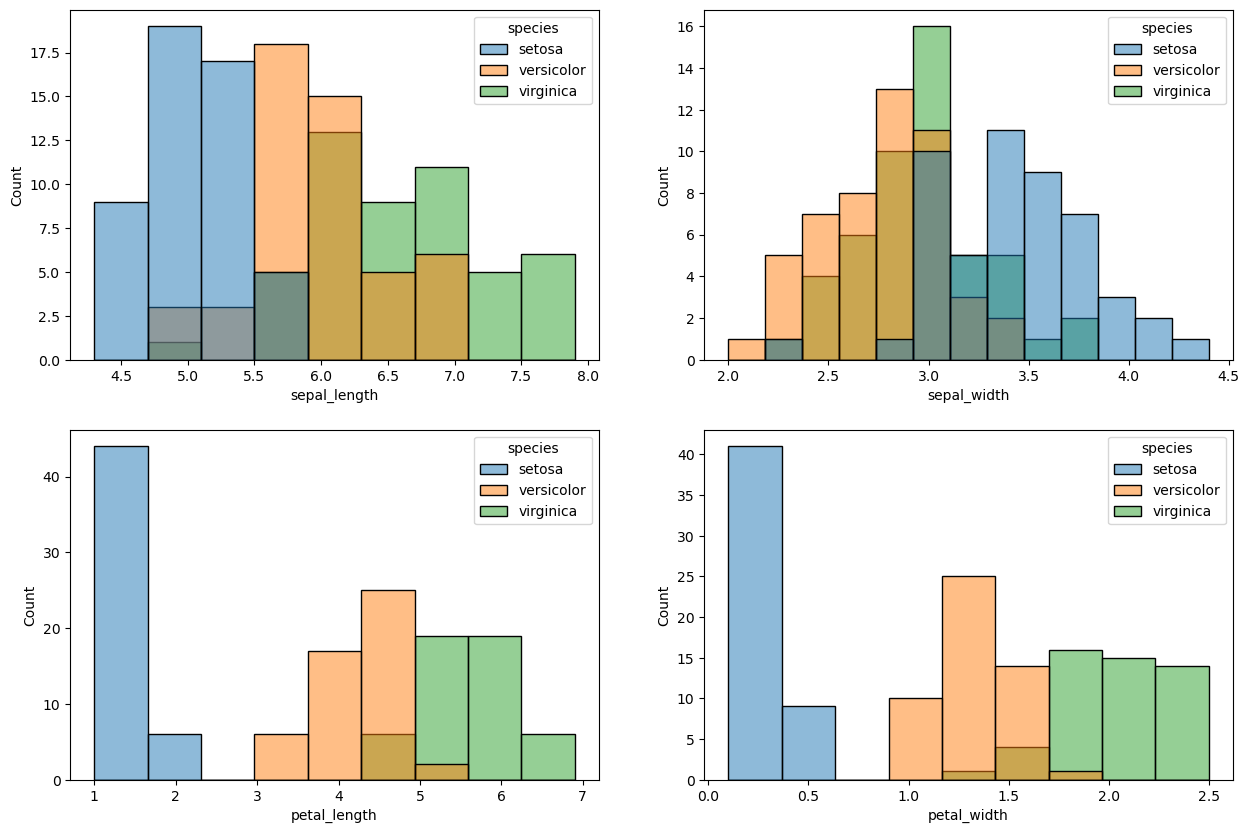

In [33]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], start=1):
    plt.subplot(2,2,i)
    sns.histplot(
        data = df,
        x = col,
        hue = "species"
    )

sns의 kdeplot를 이용하여 확률 밀도 함수를 시각화 합니다.

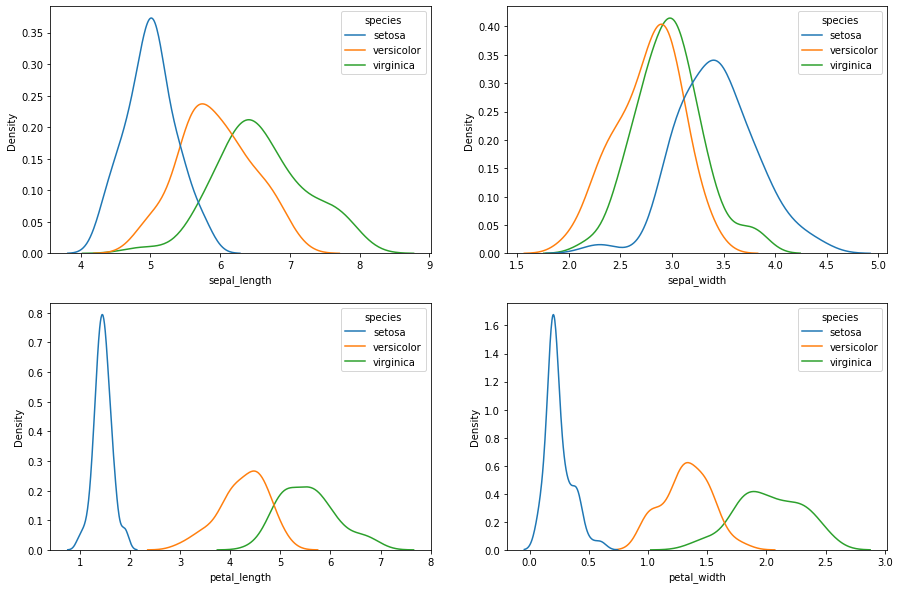

In [14]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], start=1):
    plt.subplot(2,2,i)
    sns.kdeplot(
        data = df,
        x = col,
        hue = "species"
    )

- petal_length, petal_width가 specices별로 극명히 나뉘는 것 같습니다.

sns의 pairplot를 이용하여 컬럼들 간의 산점도와 kde 그래프를 동시에 그려봅니다.

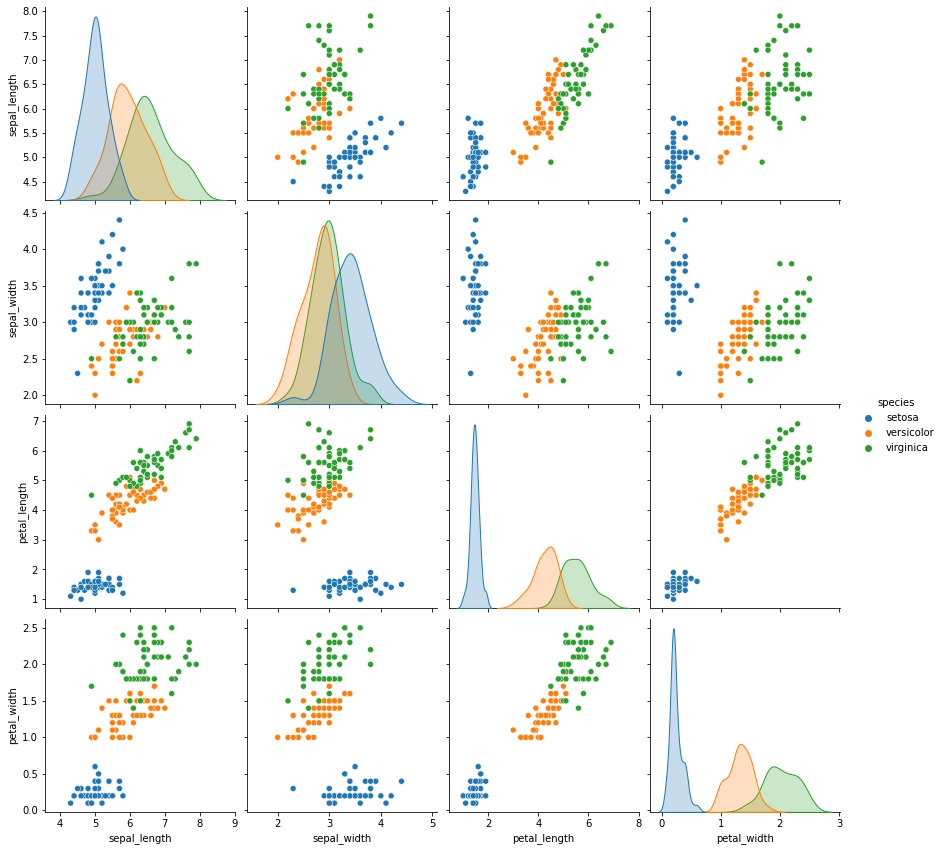

In [15]:
sns.pairplot(df, hue="species", size=3, diag_kind="kde")
plt.show()


- 컬럼간의 조합을 보았을 때 species를 확연히 구분해주는 조합도 있음을 알 수 있습니다.

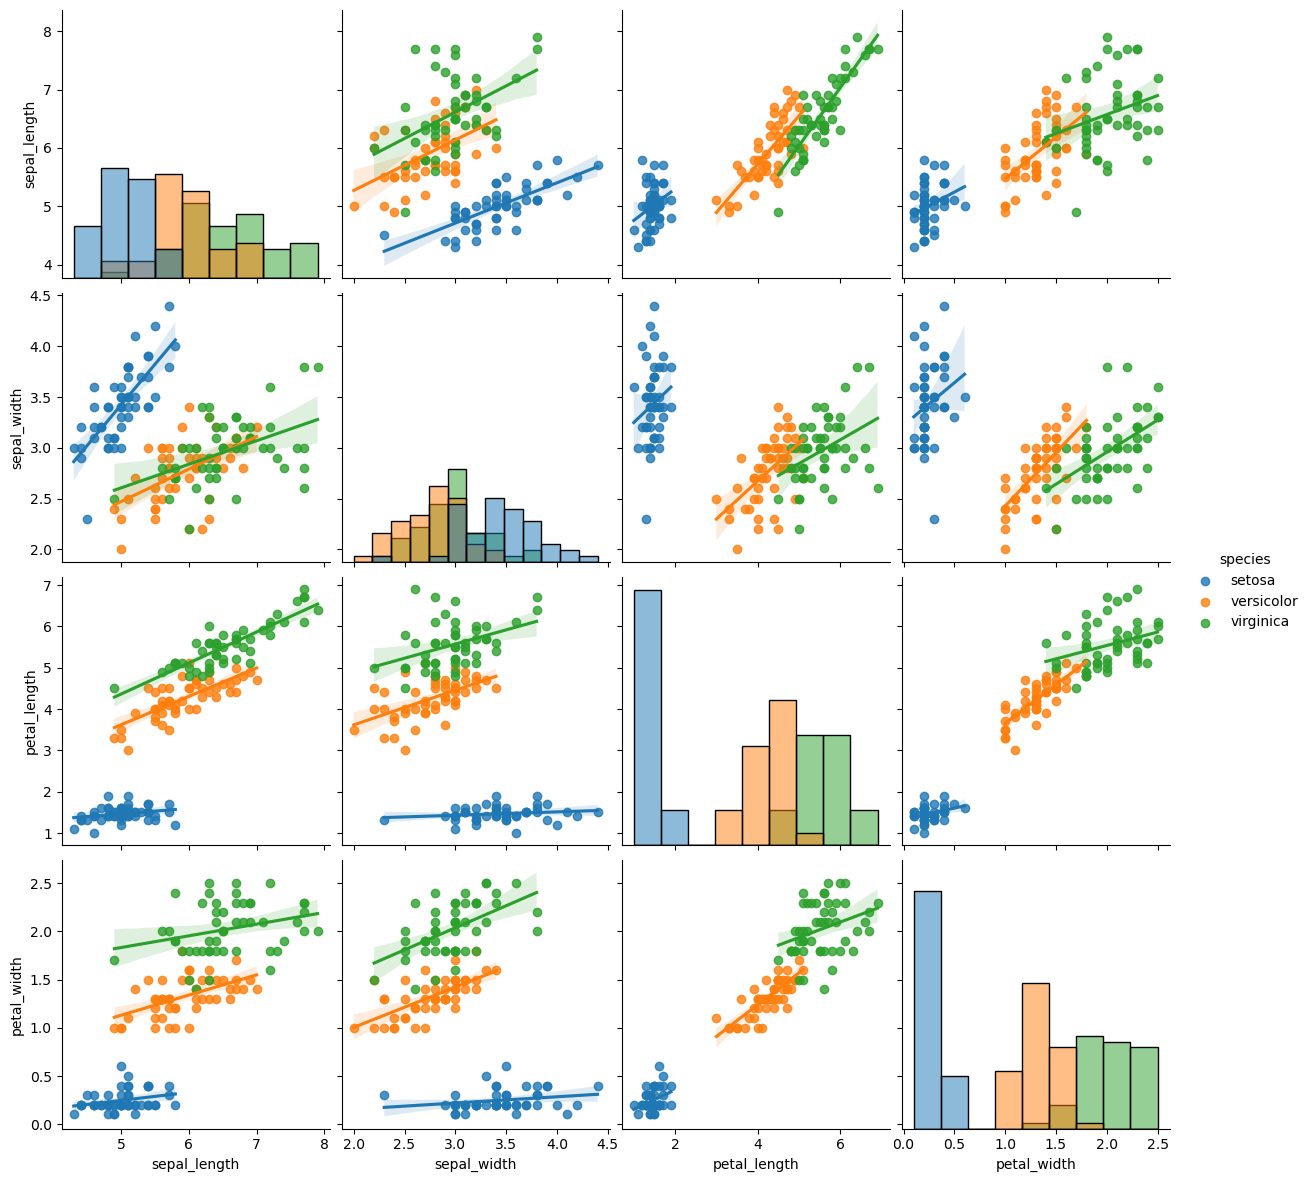

In [35]:
sns.pairplot(df, hue="species", size=3, kind = 'reg', diag_kind="hist")
plt.show()

heatmap을 이용하여 상관계수를 시각화 합니다.

In [36]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


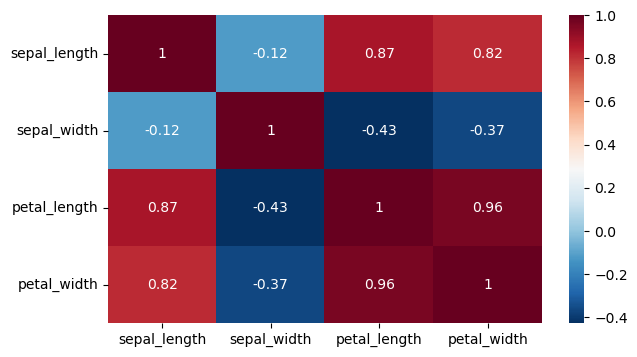

In [47]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True , cmap="RdBu_r")

- DataFrame의 corr()은 numeric dtype에 대해서만 상관관계를 그려주기 때문에 species와 다른 컬럼간의 상관관계를 확인하지 못했습니다.

species와 다른 컬럼간의 상관관계를 확인하기 위해 species를 numeric dtype으로 변경합니다.

In [50]:
species_unique_values = df.species.unique()
df.replace(species_unique_values, range(len(species_unique_values)))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


sklearn의 LabelEncoder를 이용하면 간편하게 데이터를 변경할 수 있습니다.

In [54]:
le = LabelEncoder()
df["species"] = le.fit_transform(df.species)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


다시 상관관계를 시각화 합니다.

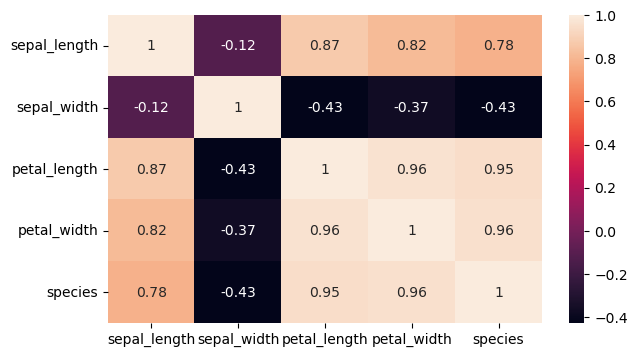

In [55]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True)

- petal 관련 컬럼이 가장 높은 상관계수가 나온 것을 볼 수 있습니다.

iris 데이터셋은 컬럼의 갯수가 적지만 현실의 데이터는 컬럼의 갯수가 굉장히 많습니다.

컬럼의 갯수가 많은 상황에서 상관계수를 일일히 눈으로 확인하기는 어려운 일입니다. 이런 경우 상관계수를 정렬하여 확인하면 상관계수가 높은 컬럼들만 쉽게 확인 할 수 있습니다.

상관계수는 절대값을 씌워서 확인해야 하므로 key 파라미터에 abs를 적용하도록 합니다.

In [56]:
corr_values = df.corr()
corr_values.sort_values(by="species", key=abs, ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
species,0.782561,-0.426658,0.949035,0.956547,1.000000
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658


- sepal 관련 컬럼은 patal 관련 컬럼에 비해 상관계수가 낮습니다.

width와 length의 비율을 계산하여 상관계수를 구해봅니다.

In [57]:
# df를 복사하여 새로운 데이터프레임 생성
new_df = df.copy() 
new_df["petal_ratio"] =  df.petal_width / df.petal_length 
new_df["sepal_ratio"] =  df.sepal_width / df.sepal_length 
new_df

,sepal_length,sepal_width,petal_length,petal_width,species,petal_ratio,sepal_ratio
0,5.1,3.5,1.4,0.2,0,0.142857,0.686275
1,4.9,3.0,1.4,0.2,0,0.142857,0.612245
2,4.7,3.2,1.3,0.2,0,0.153846,0.680851
3,4.6,3.1,1.5,0.2,0,0.133333,0.673913
4,5.0,3.6,1.4,0.2,0,0.142857,0.720000
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.442308,0.447761
146,6.3,2.5,5.0,1.9,2,0.380000,0.396825
147,6.5,3.0,5.2,2.0,2,0.384615,0.461538
148,6.2,3.4,5.4,2.3,2,0.425926,0.548387


<AxesSubplot:>

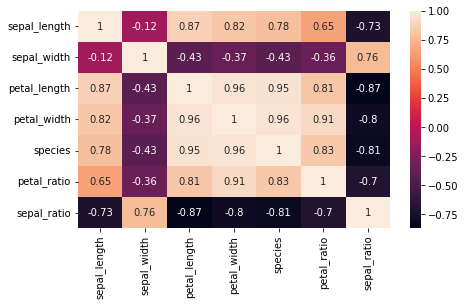

In [21]:
plt.figure(figsize=(7,4)) 
sns.heatmap(new_df.corr(), annot=True)

- sepal_ratio가 sepal_length, sepal_width에 비해 높은 상관계수를 보이고 있습니다.
- 하지만 petal_ratio의 상관계수는 더 낮아진 것을 볼 수 있습니다.

new_df의 상관계수를 정렬하여 확인합니다.

In [58]:
corr_values = new_df.corr()
corr_values.sort_values(by="species", key=abs, ascending=False)[["species"]]

,species
species,1.000000
petal_width,0.956547
petal_length,0.949035
petal_ratio,0.831451
sepal_ratio,-0.811953
sepal_length,0.782561
sepal_width,-0.426658


sns의 regplot를 이용하여 두 변수 간의 선형 회귀 모델을 시각화 합니다.

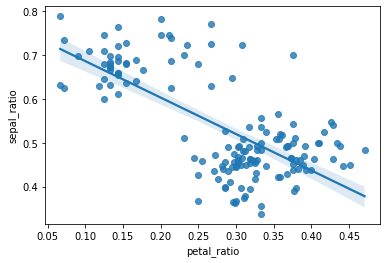

In [23]:
sns.regplot(
    data = new_df,
    x = "petal_ratio",
    y = "sepal_ratio",
)
plt.show()

### 1.2 붓꽃 데이터로 붓꽃 종류 분류해보기 
- 비지도 학습 - Clustering 사용
- K-Means Clustering 활용

In [101]:
df = pd.read_csv("./data/iris.csv")
df.loc[df['species'] == 'setosa', 'species'] = 0        # setosa -> 0
df.loc[df['species'] == 'versicolor', 'species'] = 1    # versicolor -> 1
df.loc[df['species'] == 'virginica', 'species'] = 2     # virginica -> 2

In [102]:
X = df.iloc[:, :-1]          # ﻿꽃잎(petal))의 길이(length)와 너비(width) 데이터만 추출
y = df['species']

In [103]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 1.2.1 최적의 K 찾기
k-means clustering을 할 때 가장 중한 파라미터 중 하나가 k를 찾는 것입니다. 최적의 k를 찾는 방법은 여러 가지가 있지만 그 중 킨크의 스크리 도표(Elbow Method)를 사용해 찾아보겠습니다.

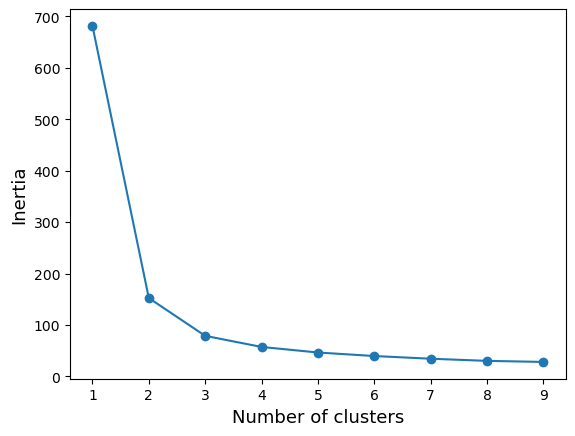

In [104]:
from sklearn.cluster import KMeans

inertia_arr = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters= k, random_state= 21)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertia_arr.append(inertia)

# Elobw Method 그래프 그리기
plt.plot(k_range, inertia_arr, marker= 'o')
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()

킨크의 스크리 도표(Elbow Method)를 그래프로 그려서 확인해본 결과 클러스터의 개수가 2개 또는 3개가 적당하다는 것을 알 수 있습니다.

#### 1.2.2 K-means Clustering 하기
먼저 K가 2인 경우를 먼저 실습해보겠습니다.

Text(0.5, 1.0, 'Predicted')

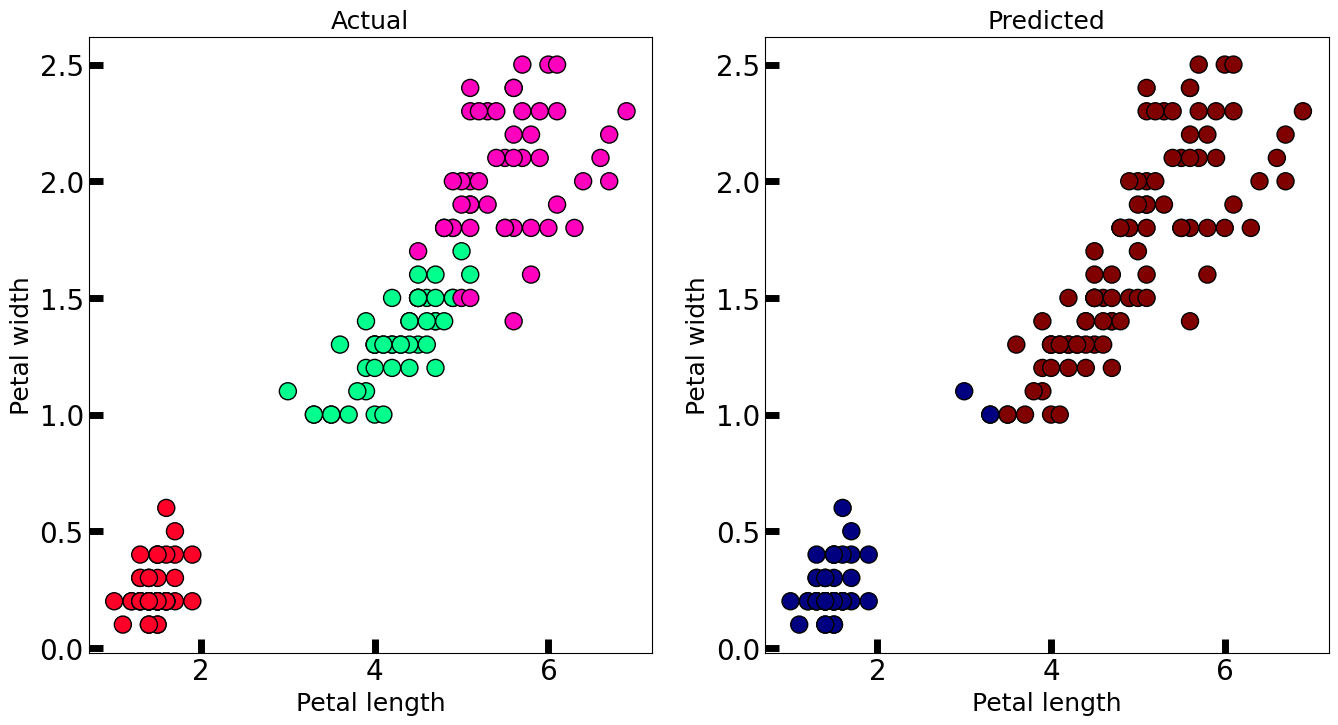

In [105]:
kmeans = KMeans(n_clusters = 2, random_state=21)
kmeans.fit(X)

y_pred = kmeans.labels_

# 비교 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize = (16,8))

# Iris 꽃잎 그래프
axes[0].scatter(df['petal_length'], df['petal_width'], c = y, cmap = 'gist_rainbow', edgecolor = 'k', s = 150)
axes[0].set_xlabel('Petal length', fontsize = 18)
axes[0].set_ylabel('Petal width', fontsize = 18)
axes[0].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[0].set_title('Actual', fontsize = 18)

# K-Means Clustering을 통해 예측한 결과 그래프
axes[1].scatter(df['petal_length'], df['petal_width'], c = y_pred, cmap = 'jet', edgecolor = 'k', s = 150)
axes[1].set_xlabel('Petal length', fontsize = 18)
axes[1].set_ylabel('Petal width', fontsize = 18)
axes[1].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[1].set_title('Predicted', fontsize = 18)

 K가 3인 경우를 실습해보겠습니다.

Text(0.5, 1.0, 'Predicted')

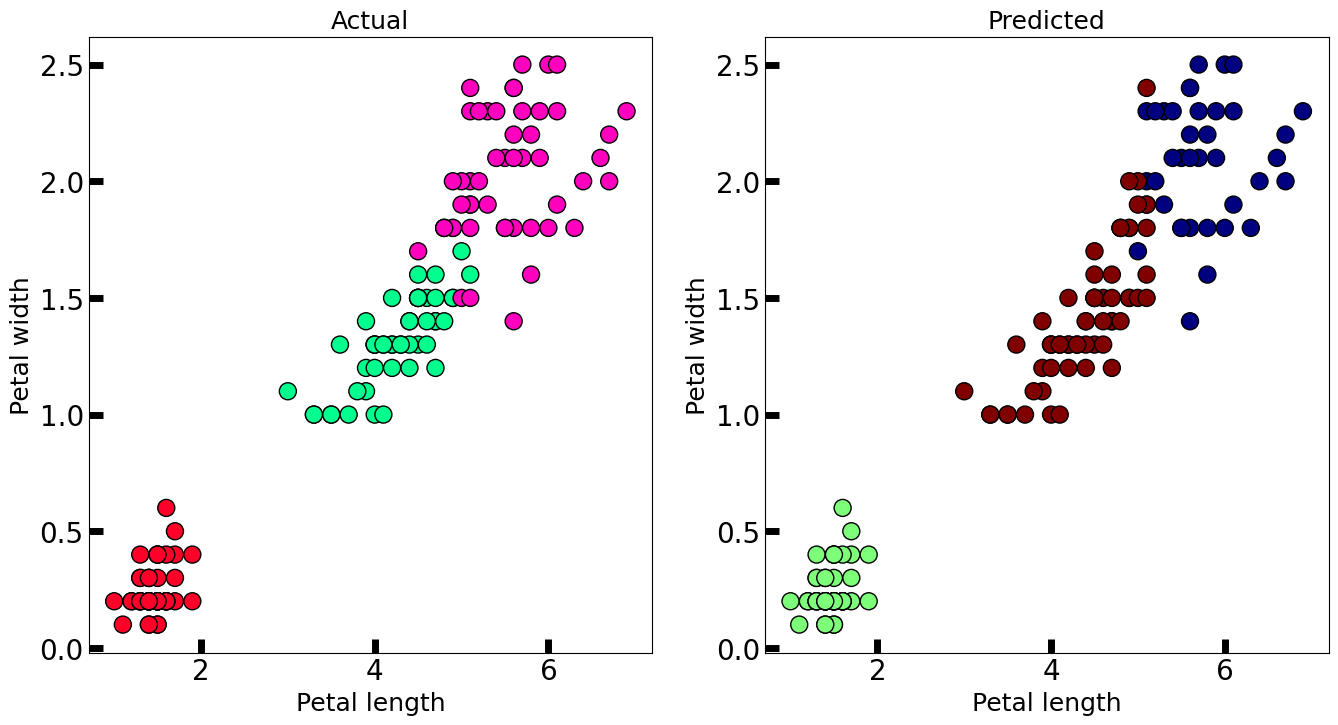

In [106]:
kmeans = KMeans(n_clusters = 3, random_state=21)
kmeans.fit(X)

y_pred = kmeans.labels_

# 비교 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize = (16,8))

# Iris 꽃잎 그래프
axes[0].scatter(df['petal_length'], df['petal_width'], c = y, cmap = 'gist_rainbow', edgecolor = 'k', s = 150)
axes[0].set_xlabel('Petal length', fontsize = 18)
axes[0].set_ylabel('Petal width', fontsize = 18)
axes[0].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[0].set_title('Actual', fontsize = 18)

# K-Means Clustering을 통해 예측한 결과 그래프
axes[1].scatter(df['petal_length'], df['petal_width'], c = y_pred, cmap = 'jet', edgecolor = 'k', s = 150)
axes[1].set_xlabel('Petal length', fontsize = 18)
axes[1].set_ylabel('Petal width', fontsize = 18)
axes[1].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[1].set_title('Predicted', fontsize = 18)

이렇게 해서 K-means Clustering 실습을 마무리합니다. **원래 Iris 데이터를 가지고 그린 그림과 K-means Clustring을 통해 그린 그림의 차이가 있습니다.** 그 이유는 K-means Clustering은 클러스터링 모델이기 때문에 섞여 있는 부분에 대해서는 정확하게 클러스터링을 할 수 없다는 한계점을 가지고 있습니다. 

1) 장점   
첫 번째, 알고리즘이 단순하고, 속도가 빠릅니다.   
두 번째, 알고리즘을 여러 영역으로 확장이 용이합니다.   
마지막으로 비지도 학습을 하는 알고리즘이기 때문에 주어진 데이터에 대한 사전 정보 없이 클러스터링이 가능합니다.

2) 단점   
첫 번째, 최적의 K 값을 찾기 위해서는 알고리즘을 여러 번 돌려 합니다.    
두 번째, 클러스터(군집)이 이산적이라는 가정을 가지고 만들어진 알고리즘이기 때문에 클러스터가 겹치거나 중첩되는 경우를 허용하지 않습니다.      
마지막으로 클러스터의 반지름을 줄여나가는 형태로 알고리즘을 작동하기 때문에 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 클러스터링이 잘되지 않습니다.


---



## 2. 은나노 입자 생성 과정에 대한 개요 및 데이터 특성 이해

---

**은 나노**
- 은 나노는 미생물 성장 억제 및 대전을 방지하는 특성을 가지고 있어 항균탈취 기능이 필요한 가전, 섬유, 페인트 등에 사용
- 귀금속이기도 하지만 세계 생산량 70% 이상이 공업용에 사용
- 백금을 제외한 모든 금속 중 가장 큰 전기전도성 보유

**은나노 화학적 합성법 종류**

- 기상법
    - 플라즈마나기체증발법을사용
    - 고가의 장비 필요
- 액상법(액상환원법)
    - 저비용으로 균일한 입자 합성 가능
    - 액상에서 금속 화합물을 해리시킨 후 환원제나 계면활성제를사용하여 히드로졸(hydrosol) 형태의 금속 나노 입자를 제조
- 기계적제조방법
    - 공정상 불순물의 혼입으로 고 순도의입자 합성하기 어려움
    - 나노 사이즈의 균일한 입자 형성 불가능
- 전기적제조방법
    - 제조시간이길고, 농도가낮아효율이낮음

**배치 반응기**

![배치반응기](./%EB%B0%B0%EC%B9%98%EB%B0%98%EC%9D%91%EA%B8%B0.png)

- 최적의 환경을 제공하여 화학 또는 생물학적 반응을 유도하는 기구
- 은나노합성요인
    - 1.온도 2.원료물질 3.반응물질 4.주입속도 5.반응시간 6.회전속도
    - 위 6가지 요소에 따라 은나노 입자의 크기가 분류되며 목표 되는 5nm합성을 위한 요인들을 조합해야 함
    



## 3. 데이터 결측치, 이상치 및 노이즈 탐지 및 처리
---


pandas의 [read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)를 이용하여 csv를 불러옵니다. 


**컬럼별 의미**

| 컬럼 명| 의미 |
|---- | ---- |
| temp | 반응 섭씨 온도 |
| Fahr | 반응 화씨 온도 |
| source | 원료 물질(은이온, AgNO3) |
| reactant | 반응 물질(PVP) |
| inject_speed | 주입 속도 |
| react_time | 반응 시간 |
| stir_rpm | 회전 속도 |
| nano_particle | 은나노 입자 생성여부 |


In [59]:
df = pd.read_csv("./data/silver_nanoparticle.csv")
df

,id,temp,Fahr,humidity,source,reactant,inject_speed,react_time,stir_rpm,nano_particle
0,TEST 06,100,212,NaN,0.29,0.013,1.4,24,700,0
1,TEST 09,20,68,NaN,0.47,0.012,0.6,44,400,0
2,TEST 07,40,104,NaN,0.21,0.045,1.7,13,1000,0
3,TEST 01,60,140,NaN,0.25,0.008,0.8,8,400,0
4,TEST 01,40,104,NaN,0.15,0.044,1.2,38,700,0
...,...,...,...,...,...,...,...,...,...,...
2995,TEST 00,30,86,NaN,0.32,0.010,2.2,18,600,0
2996,TEST 00,150,302,NaN,0.33,0.029,2.5,34,800,0
2997,TEST 05,110,230,NaN,0.27,0.025,1.7,32,800,0
2998,TEST 09,200,392,72.011,0.36,0.011,2.3,50,1100,1


[info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)를 이용하여 df의 간단한 정보를 확인합니다.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3000 non-null   object 
 1   temp           3000 non-null   int64  
 2   Fahr           3000 non-null   int64  
 3   humidity       211 non-null    float64
 4   source         3000 non-null   float64
 5   reactant       3000 non-null   float64
 6   inject_speed   3000 non-null   float64
 7   react_time     3000 non-null   int64  
 8   stir_rpm       3000 non-null   int64  
 9   nano_particle  3000 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 234.5+ KB


- humidity의 결측치가 굉장히 많은 것을 확인 할 수 있습니다.
- row는 3000개이며, 인덱스가 0부터 2999까지 있으므로 중복되는 인덱스는 없어보입니다.
- 위에서 확인한 df의 값들과 info를 통한 Dtype를 비교하였을 때 각 피쳐별로 알맞은 Dtype이 할당되어 있는 것 같습니다.

[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)를 이용하여 간단한 통계치들을 확인합니다.

In [61]:
df.describe()

,temp,Fahr,humidity,source,reactant,inject_speed,react_time,stir_rpm,nano_particle
count,3000.000000,3000.00000,211.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,116.596667,241.87400,73.392057,0.28318,0.027430,1.710167,28.700333,820.200000,0.401000
std,45.341695,81.61505,10.010203,0.10518,0.010861,0.700250,10.555204,256.399181,0.490183
min,20.000000,68.00000,60.821000,0.05000,0.005000,0.200000,5.000000,300.000000,0.000000
25%,90.000000,194.00000,66.015000,0.23750,0.021000,1.300000,24.000000,700.000000,0.000000
50%,120.000000,248.00000,70.323000,0.29000,0.027000,1.800000,29.000000,900.000000,0.000000
75%,150.000000,302.00000,79.973000,0.34000,0.034000,2.300000,35.000000,1000.000000,1.000000
max,200.000000,392.00000,96.026000,0.50000,0.050000,2.900000,50.000000,1200.000000,1.000000


- mean에 비해 std가 너무 크다거나 min ~ max의 값이 급격하게 변하는 피쳐가 없는 것으로 보아 도메인 지식은 제외하고 수치적으로만 보았을 때 이상치는 없어 보입니다.


[drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)을 이용하여 일부 컬럼을 삭제합니다.

In [62]:
df.drop(columns=["Fahr", "humidity"], inplace=True)

- temp, Fahr는 같은 의미를 가지고 있으며 우리는 섭씨에 익숙하므로 화씨 의미를 가지는 Fahr 컬럼을 삭제합니다.
- humidity는 결측치가 너무 많으므로 삭제합니다.

In [64]:
df.head()

,id,temp,source,reactant,inject_speed,react_time,stir_rpm,nano_particle
0,TEST 06,100,0.29,0.013,1.4,24,700,0
1,TEST 09,20,0.47,0.012,0.6,44,400,0
2,TEST 07,40,0.21,0.045,1.7,13,1000,0
3,TEST 01,60,0.25,0.008,0.8,8,400,0
4,TEST 01,40,0.15,0.044,1.2,38,700,0


[nunique()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)를 이용하여 각 컬럼별 unique한 값의 갯수를 확인합니다.


In [70]:
df['inject_speed'].unique()

array([1.4, 0.6, 1.7, 0.8, 1.2, 0.4, 2.6, 2.7, 2.1, 2.8, 2.5, 0.9, 1.9,
       0.5, 2.2, 1.5, 1.1, 2.4, 0.7, 2.9, 1.6, 2.3, 2. , 0.3, 1.8, 1. ,
       1.3, 0.2])

In [65]:
df.nunique()

id               10
temp             19
source           46
reactant         46
inject_speed     28
react_time       46
stir_rpm         10
nano_particle     2
dtype: int64

- 유니크 갯수가 1개이면서 결측치가 없는 컬럼은 데이터 분석에 도움이 되지 않으므로 삭제합니다.
- 유니크 갯수가 1개이면서 결측치가 존재하는 컬럼은 상황 혹은 도메인에 따라 해당 컬럼의 값들을 값 존재의 유무에 따라 True, False로 변환하여 데이터분석에 활용할 수 있습니다.
- nunique()의 결과를 확인하였을 때 삭제할 컬럼은 없어보입니다.

## 4. 히스토그램, 박스 플롯 등 데이터 시각화를 통한 EDA
---
[value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)를 이용하여 시리즈가 가지는 고유한 값들의 갯수를 확인합니다.   

In [29]:
df.nano_particle.value_counts()

0    1797
1    1203
Name: nano_particle, dtype: int64

- 0의 갯수가 더 많은 것을 보아 은나노 입자가 생성되지 않은 경우가 더 많은 것을 알 수 있습니다.

[plot.pie()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)를 이용하여 nano_particle의 비율을 확인합니다.   

pandas의 plot.pie는 [matplotlib.pyplot.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)를 이용하여 만들어진 함수입니다. 때문에 plot.pie()의 도큐먼트에서는 자세한 설명이 없는 파라미터이지만 matplotlib.pyplot.pie()에서 사용하는 파라미터를 사용할 수 있습니다.

- autopct: matplotlib.pyplot.pie()의 파라미터로서 차트 내에서 각 파이의 비율을 표기하며 소숫점 자릿수 제한도 할 수 있습니다. 

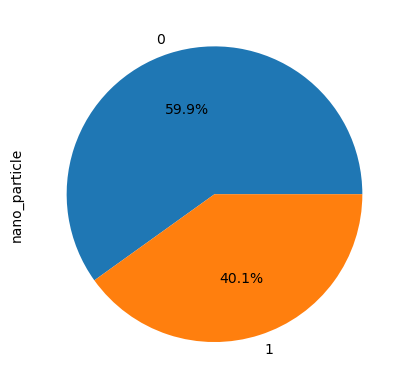

In [71]:
df.nano_particle.value_counts().plot.pie(y="nano_particle",  autopct='%1.1f%%')

In [31]:
df.id.value_counts()

TEST 08    361
TEST 05    333
TEST 02    301
TEST 07    300
TEST 04    298
TEST 03    296
TEST 09    294
TEST 01    275
TEST 06    273
TEST 00    269
Name: id, dtype: int64

`df`의 컬럼들이 가지고 있는 값들을 직접 확인합니다.   
통계치, 그래프 등으로 데이터를 이해하는 것도 중요하지만 데이터의 아주 상세한 부분까지 파악하는 것도 중요합니다.   
그래야만 진정한 EDA(탐색적 데이터 분석)를 할 수 있고 이는 성능 좋은 예측 모델을 만드는 발판이 됩니다.

In [72]:
# unique 관련 정보를 확인하기 위한 cols 추출
cols = df.columns[1:-1] # Index(['temp', 'source', 'reactant', 'inject_speed', 'react_time', 'stir_rpm'], dtype='object')

for col in cols:
    print(f"column: {col}")
    uniq = sorted(df[col].unique())
    print(f"min value [{min(uniq)}]")
    print(f"max value [{max(uniq)}]")
    print("values", uniq)
    print()

column: temp
min value [20]
max value [200]
values [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

column: source
min value [0.05]
max value [0.5]
values [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5]

column: reactant
min value [0.005]
max value [0.05]
values [0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]

column: inject_speed
min value [0.2]
max value [2.9]
values [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0

- 값들을 확인한 결과 각 컬럼별로 일정한 간격으로 차이가 나는 것을 볼 수 있습니다. 

[corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)을 이용하여 DataFrame에서 상관계수를 추출합니다.   
[heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)을 이용하여 상관계수를 시각화합니다.

- 우리가 예측해야 할 nano_particle과 다른 컬럼간의 상관계수를 살펴봅니다.
- annot: 히트맵 내에서 값을 표현해줍니다.

In [73]:
corr_df = df.corr()
corr_df

,temp,source,reactant,inject_speed,react_time,stir_rpm,nano_particle
temp,1.000000,0.063848,-0.110355,0.094243,-0.009482,0.038814,0.197198
source,0.063848,1.000000,0.060669,0.057279,0.057700,0.011799,0.098011
reactant,-0.110355,0.060669,1.000000,0.044511,0.014362,0.007330,-0.024845
inject_speed,0.094243,0.057279,0.044511,1.000000,-0.041845,0.201790,0.225245
react_time,-0.009482,0.057700,0.014362,-0.041845,1.000000,0.065111,0.063254
stir_rpm,0.038814,0.011799,0.007330,0.201790,0.065111,1.000000,0.321816
nano_particle,0.197198,0.098011,-0.024845,0.225245,0.063254,0.321816,1.000000


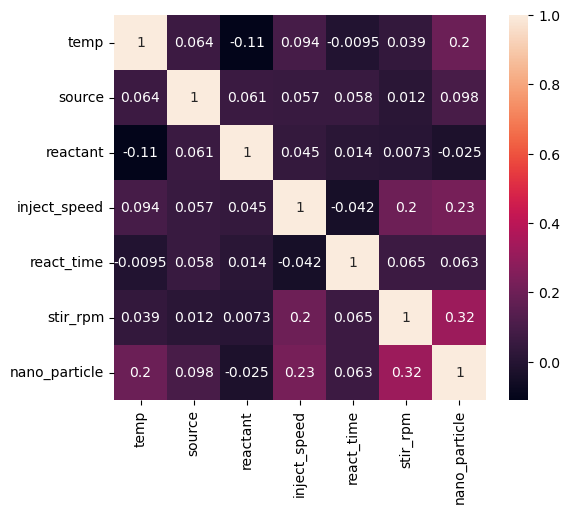

In [77]:
plt.figure(figsize=(6, 5))
corr_df = df.corr()
sns.heatmap(corr_df, annot=True)
plt.show()

각 컬럼별 히스토그램과 박스플롯을 확인하는 함수를 작성합니다.

In [83]:
def show_hist_pox_plot(df, true_df, false_df, target_col):
    # figure size를 12 by 10 형태로 설정
    plt.figure(figsize=(12,10))

    # 4 by 1 형태의 ax를 가지는 figure 중 1번째 ax에 그래프를 그리겠다라고 선언
    plt.subplot(411) 

    # 현재 ax의 title을 target_col로 설정
    plt.title(target_col)
    sns.histplot(
        data = df,
        x = target_col,
        hue = "nano_particle", 
        bins = min(len(df[target_col].unique()), 50) # x축을 몇개의 그룹으로 묶어줄 것 인지 결정
    )

    # 아래에서 그리는 boxplot과 직접적인 x 축 비교를 위해서 ax의 왼쪽 부분에 자리를 차지하는 y에 대한 정보를 삭제
    plt.yticks([])
    plt.ylabel("")

    plt.figure(figsize=(12,2))
    plt.subplot(412)

    plt.title("boxplot of df")
    sns.boxplot(
        data = df,
        x = target_col
    )

    plt.figure(figsize=(12,2))
    plt.subplot(412)

    plt.title("boxplot of true_df")
    sns.boxplot(
        data = true_df,
        x = target_col,
        color="blue"
    )

    plt.figure(figsize=(12,2))
    plt.subplot(412)

    plt.title("boxplot of false_df")
    sns.boxplot(
        data = false_df,
        x = target_col,
        color = "red"

    )
    plt.show()

은나노 입자 생성이 된 case와 생성되지 않은 case를 구분하여 각각의 df로 저장합니다.

In [79]:
true_df = df.query("nano_particle == 1")   # 은나노 입자 생성 경우
false_df = df.query("nano_particle == 0")  # 은나노 입자 생성 X 경우

인사이트를 추출하기 위해 각 컬럼별 데이터를 시각화 합니다.

temp corr value: 0.1972


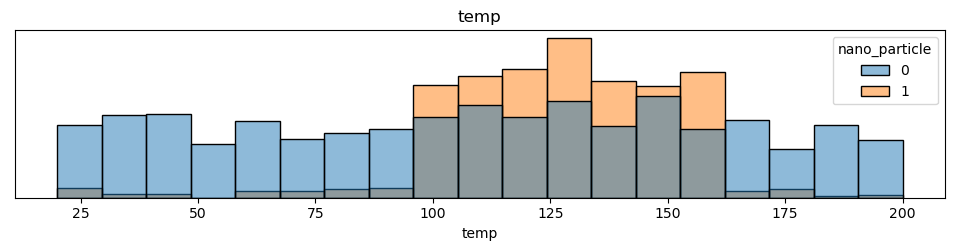

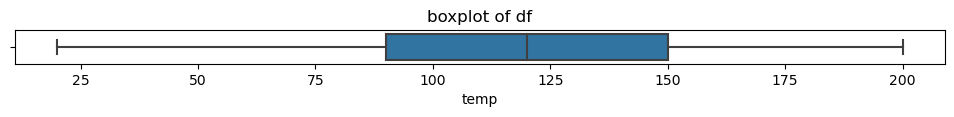

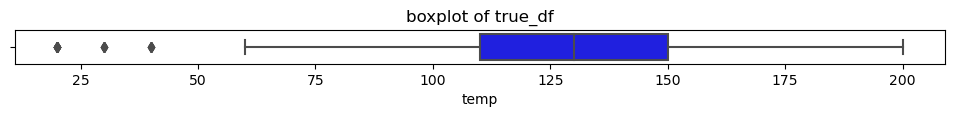

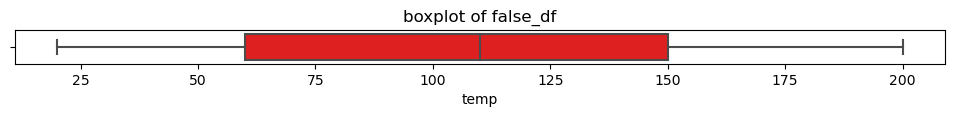





source corr value: 0.098


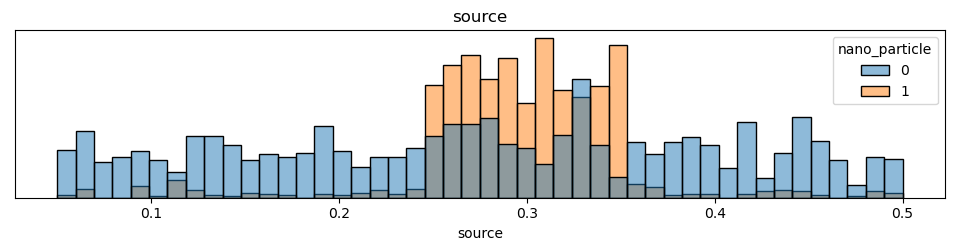

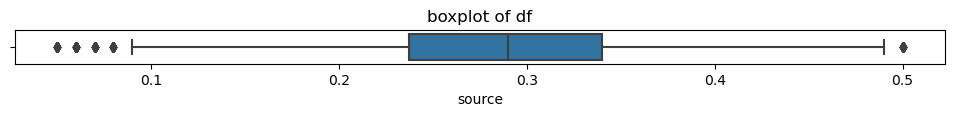

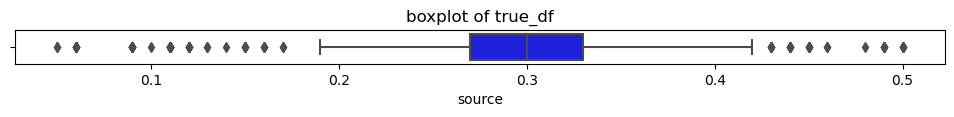

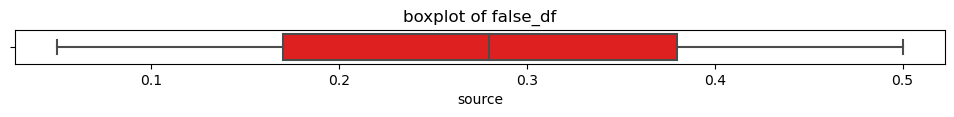





reactant corr value: -0.0248


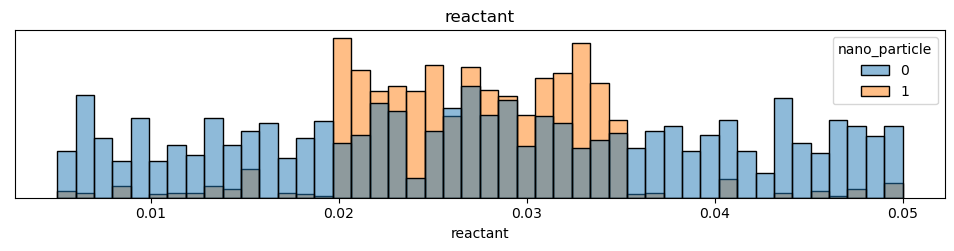

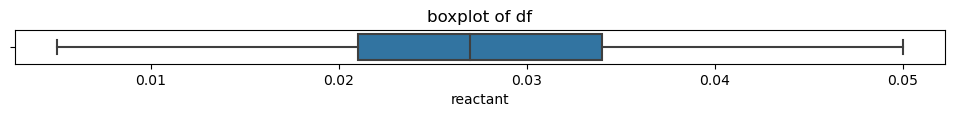

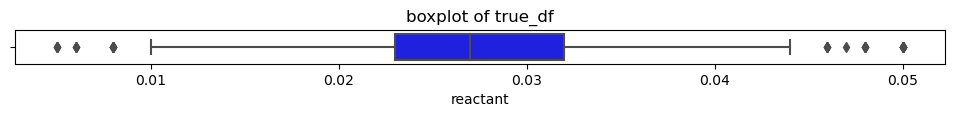

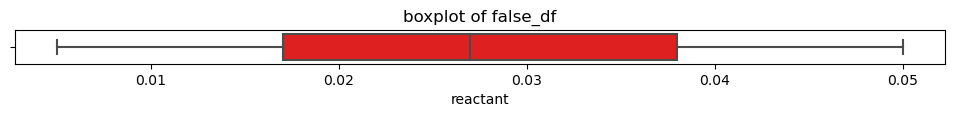





inject_speed corr value: 0.2252


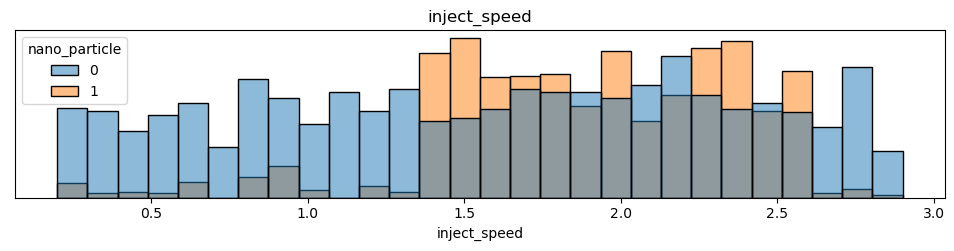

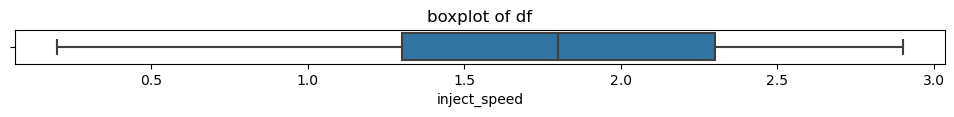

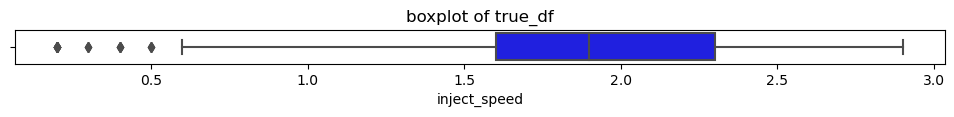

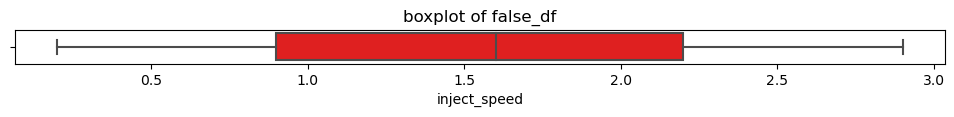





react_time corr value: 0.0633


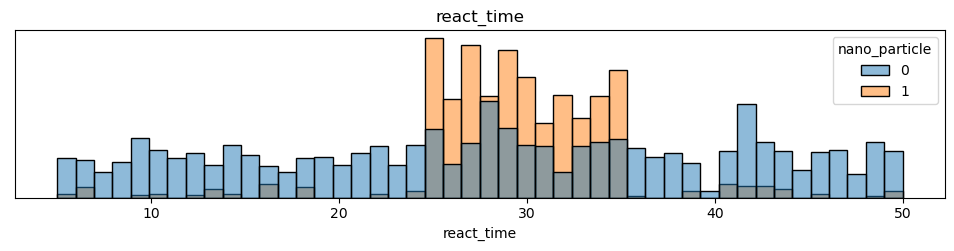

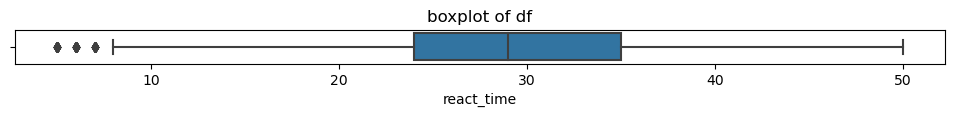

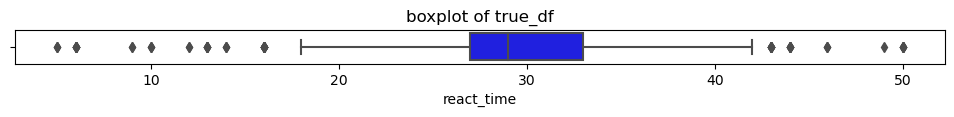

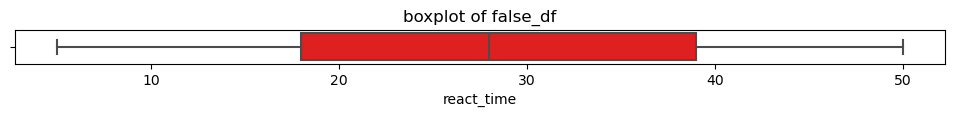





stir_rpm corr value: 0.3218


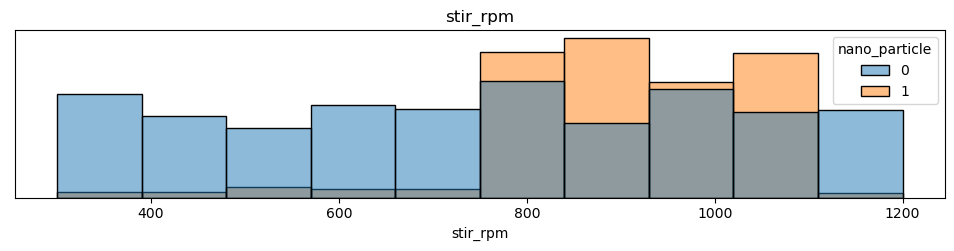

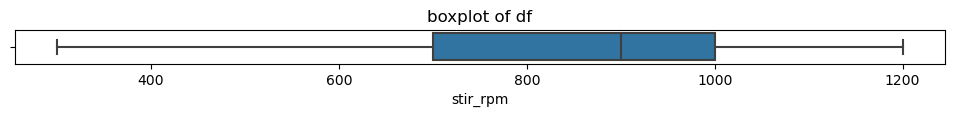

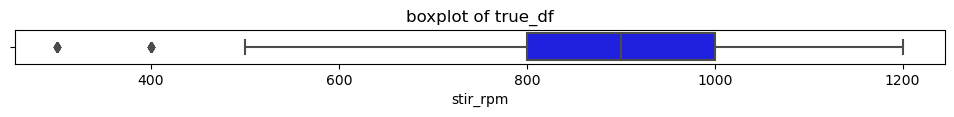

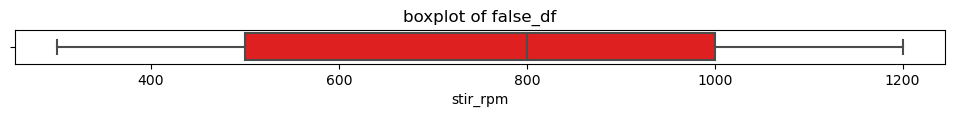

In [84]:
for col in cols:
    print(f"{col} corr value: {round(corr_df.nano_particle[col], 4)}")
    show_hist_pox_plot(df, true_df, false_df, col)
    print("\n\n\n")

- 모든 컬럼별로 특정 값의 범위를 벗어날 때 nano_particle의 분포가 확연히 달라지는 것을 볼 수 있습니다.

각 컬럼별로 은 나노가 생성되기 좋은 조건의 값 범위를 추출합니다.

In [96]:
len_true_df = len(true_df)
len_true_df

1203

In [98]:
len_true_df = len(true_df)    # 1203
true_range = []

for col in cols:
    # col 열을 기준으로 그룹화한 후, 각 그룹의 id 개수를 true_df의 길이로 나눈 비율을 구한다.
    ratio_df = true_df.groupby(col).id.count() / len_true_df * 100
    #print(ratio_df)
    
    # 비율이 5% 보다 큰 그룹만 선택한다.
    ratio_df = ratio_df[ratio_df > 5]
    
    # 선택된 그룹의 최소값과 최대값을 true_range 리스트에 추가한다.
    true_range.append([col, min(ratio_df.index), max(ratio_df.index)])

true_range

[['temp', 100, 160],
 ['source', 0.25, 0.35],
 ['reactant', 0.02, 0.034],
 ['inject_speed', 1.4, 2.6],
 ['react_time', 25, 35],
 ['stir_rpm', 800, 1100]]

In [90]:
true_df[true_df['temp'] == 30]

,id,temp,source,reactant,inject_speed,react_time,stir_rpm,nano_particle
100,TEST 05,30,0.10,0.047,2.4,36,700,1
418,TEST 07,30,0.12,0.041,0.2,5,1200,1
845,TEST 06,30,0.44,0.012,0.4,16,500,1
1146,TEST 07,30,0.12,0.041,0.2,5,1200,1
2392,TEST 07,30,0.12,0.041,0.2,5,1200,1


In [87]:
 true_df.groupby('temp').id.count()

temp
20      12
30       5
40       5
60       8
70       8
80      11
90      13
100    143
110    155
120    164
130    203
140    148
150    142
160    160
170      9
180     11
190      2
200      4
Name: id, dtype: int64


## 5. EDA 결과 평가 및 의미 도출
---
- 데이터가 깔끔하게 정리되어있음을 확인
- 은나노가 생성되지 않은 case와 생성된 case의 hist, box plot을 비교하였을 때 값의 차이가 명확함
- temp의 값을 100 ~ 160으로 유지하면 은나노 입자 생성 확률이 증가
- source의 값을 0.25 ~ 0.35으로 유지하면 은나노 입자 생성 확률이 증가
- reactant의 값을 0.02 ~ 0.034으로 유지하면 은나노 입자 생성 확률이 증가
- inject_speed의 값을 1.4 ~ 2.6으로 유지하면 은나노 입자 생성 확률이 증가
- react_time의 값을 25 ~ 35으로 유지하면 은나노 입자 생성 확률이 증가
- stir_rpm의 값을 800 ~ 1100으로 유지하면 은나노 입자 생성 확률이 증가